<a href="https://colab.research.google.com/github/shielamms/AI-and-Data-Analysis/blob/master/CNNs_with_Color_Images_of_Cats_and_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

import numpy as np
import os

In [ ]:
_URL = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=_URL, extract=True)

68608000/68606236 [==============================] - 1s 0us/step


In [ ]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [ ]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
num_cats_train = len(os.listdir(train_cats_dir))
num_dogs_train = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_train + num_dogs_train
total_val = num_cats_val + num_dogs_val

print('Total training cats:', num_cats_train)
print('Total training dogs:', num_dogs_train)

print('Total validation cats:', num_cats_val)
print('Total validation dogs:', num_dogs_val)
print('--')
print('Total training images:', total_train)
print('Total validationn images', total_val)

Total training cats: 1000
Total training dogs: 1000
Total validation cats: 500
Total validation dogs: 500
--
Total training images: 2000
Total validationn images 1000


### Model Parameters

In [ ]:
batch_size = 100
img_shape = 150

### Data Prep

Images must be formatted into appropriately pre-processed floating point tensors before being fed into the network.
1. Read images from the disk
2. Decode contents of these images and convert into proper grid format as per their RGB content
3. Convert them into floating point tensors
4. Rescale the tensors from values between 0 and 255 to values between 0 and 1

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
# flow_from_directory will load images from the disk, apply rescaling, and resize images using a single line of code
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(img_shape, img_shape),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(img_shape, img_shape),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


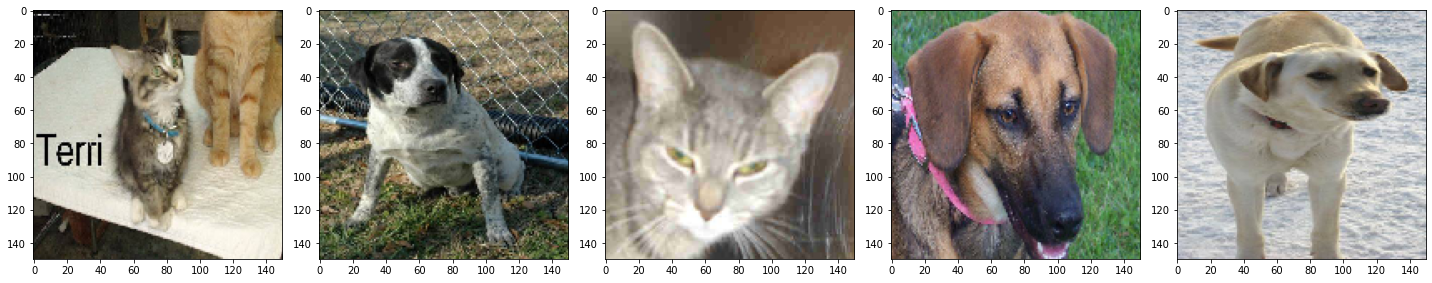

In [ ]:
sample_training_imgs, _ = next(train_data_gen)

def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20, 20))
  axes = axes.flatten()

  for img, ax in zip(images_arr, axes):
    ax.imshow(img)

  plt.tight_layout()
  plt.show()

plotImages(sample_training_imgs[:5])

### Model Creation

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

### Training

In [ ]:
epochs = 10

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch = int(np.ceil(total_train / float(batch_size))),
    epochs=epochs,
    validation_data = val_data_gen,
    validation_steps= int(np.ceil(total_val / float(batch_size)))
)

Epoch 1/10
20/20 [==============================] - 8s 407ms/step - loss: 0.0680 - accuracy: 0.9750 - val_loss: 1.1348 - val_accuracy: 0.7380
Epoch 2/10
20/20 [==============================] - 8s 393ms/step - loss: 0.0546 - accuracy: 0.9810 - val_loss: 1.0798 - val_accuracy: 0.7480
Epoch 3/10
20/20 [==============================] - 8s 393ms/step - loss: 0.0265 - accuracy: 0.9940 - val_loss: 1.4600 - val_accuracy: 0.7360
Epoch 4/10
20/20 [==============================] - 8s 397ms/step - loss: 0.0257 - accuracy: 0.9915 - val_loss: 1.4491 - val_accuracy: 0.7330
Epoch 5/10
20/20 [==============================] - 8s 393ms/step - loss: 0.0120 - accuracy: 0.9980 - val_loss: 1.5291 - val_accuracy: 0.7300
Epoch 6/10
20/20 [==============================] - 8s 392ms/step - loss: 0.0069 - accuracy: 0.9990 - val_loss: 1.7296 - val_accuracy: 0.7240
Epoch 7/10
20/20 [==============================] - 8s 394ms/step - loss: 0.0042 - accuracy: 0.9995 - val_loss: 1.6936 - val_accuracy: 0.7340
Epoch 

### Visualizing results

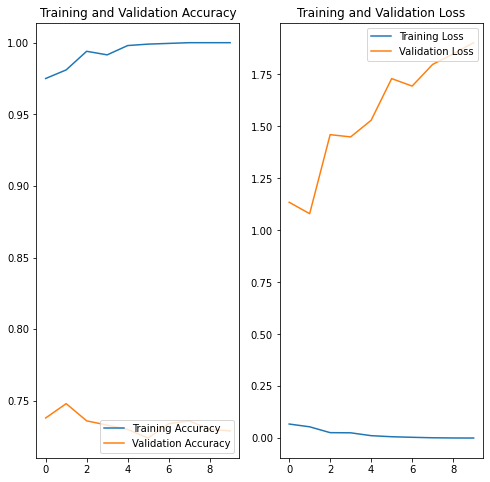

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')

plt.show()